# We will build a convolutional neural network for multiclass classification problem on the CIFAR10 dataset which contains images of 10 different classes  ("airplane", "automobile", "bird", "cat", "deer", "dog","frog", "horse", "ship", "truck") of size (32,32,3).

In [79]:
# import essential libraries

import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import datasets

In [80]:
# load and split the data

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [82]:
# Normalize all the data 
X_train = X_train/255
X_test = X_test/255

# converting labels array from 2d to 1d
y_train = y_train.flatten()
y_test = y_test.flatten()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000,), (10000,))

In [83]:
# check how many targest we have

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [84]:
# create a list of all classes to map the integer labels

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

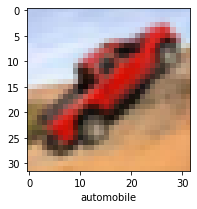

In [85]:
# function to show the image along with its label

def show_image(X,y, index):
  plt.figure(figsize=(15,3))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
  plt.show()

show_image(X_train, y_train,140)

In [86]:
# split training and validation data 

x_val = X_train[:10000]
x_train = X_train[10000:]

y_val = y_train[:10000]
y_train = y_train[10000:]

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000,), (10000,))

In [87]:
# model building 

model = tf.keras.Sequential()
# convlution+pooling layers 
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3)))
model.add(tf.keras.layers.Conv2D(64, (2,2), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3)))

# classification dense layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [88]:
# specify the loss, optimizer and metrics

model.compile(loss= "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

# At last train the model on training data
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=128)

Epoch 1/20
313/313 [==============================] - 2s 5ms/step - loss: 1.9114 - accuracy: 0.2801 - val_loss: 1.5328 - val_accuracy: 0.4417
Epoch 2/20
313/313 [==============================] - 1s 4ms/step - loss: 1.5272 - accuracy: 0.4397 - val_loss: 1.2981 - val_accuracy: 0.5286
Epoch 3/20
313/313 [==============================] - 1s 4ms/step - loss: 1.3747 - accuracy: 0.5045 - val_loss: 1.1939 - val_accuracy: 0.5746
Epoch 4/20
313/313 [==============================] - 1s 4ms/step - loss: 1.2827 - accuracy: 0.5411 - val_loss: 1.1255 - val_accuracy: 0.6026
Epoch 5/20
313/313 [==============================] - 1s 4ms/step - loss: 1.2217 - accuracy: 0.5666 - val_loss: 1.0900 - val_accuracy: 0.6207
Epoch 6/20
313/313 [==============================] - 1s 4ms/step - loss: 1.1628 - accuracy: 0.5919 - val_loss: 1.0395 - val_accuracy: 0.6374
Epoch 7/20
313/313 [==============================] - 1s 4ms/step - loss: 1.1159 - accuracy: 0.6133 - val_loss: 1.0569 - val_accuracy: 0.6235
Epoch 

In [110]:
# let's evaluate the model accuracy and loss

(loss, accuracy) = model.evaluate(X_test, y_test)
print("Accuracy :-", accuracy*100)
print("Loss :-", loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.8426 - accuracy: 0.7158
Accuracy :- 71.57999873161316
Loss :- 0.8425572514533997


In [90]:
# model prediction and conversion in a single dimension array

y_pred = model.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]
y_pred[:5]

[3, 8, 1, 0, 6]

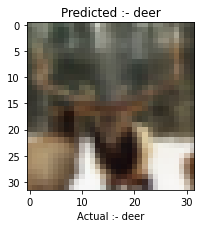

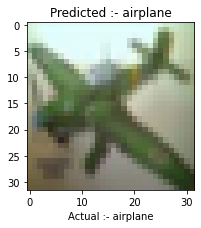

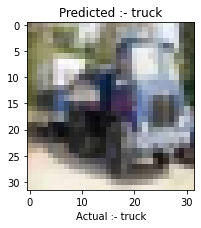

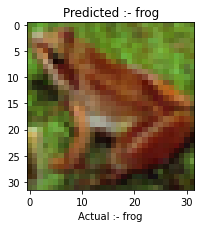

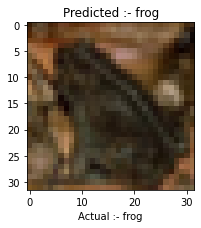

In [97]:
# function to print the image along with actual and predicted variable

def prediction(X,y,index):
  plt.figure(figsize=(3,4))
  plt.imshow(X_test[index])
  plt.xlabel("Actual :- " + str(classes[y_test[index]]))
  plt.title("Predicted :- " + str(classes[y_pred[index]]))
  plt.show()

for i in range(26,31):
  prediction(X_test, y_test, i)

In [106]:
# save the model
model.save("cnn image classification")

INFO:tensorflow:Assets written to: cnn image classification/assets


In [107]:
# load the model back

loaded_model  = tf.keras.models.load_model("cnn image classification")

In [109]:
# compile the loaded model 

loaded_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# evaluate the loaded model on test data

loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8426 - accuracy: 0.7158


[0.8425572514533997, 0.7157999873161316]

# **----------------------------------Keep learning Keep improving-------------------------------**